<a href="https://colab.research.google.com/github/aksingh21/Probabilistic-Programming-PyMC3/blob/master/pyMcWorkout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
colors = ["#348ABD", "#A60628"]
plt.rcParams.update({'font.size': 5})



**Bar Plot for Prior Distribution**

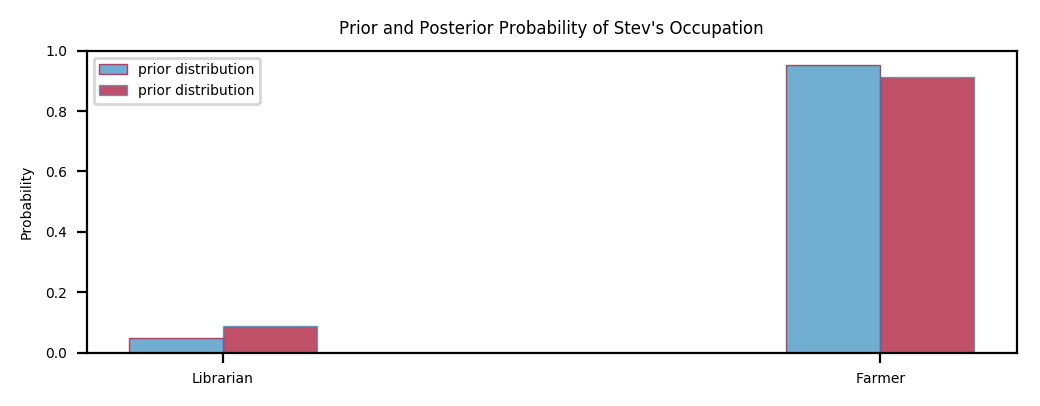

In [4]:
figsize(6, 2)
prior = [ 1/21. , 20/21. ]
posterior = [0.087, 1-0.087]
plt.bar([0, .7],prior,  alpha = 0.70, width = 0.1, color = colors[0], label = "prior distribution", lw = ".5", edgecolor = "#A60628")
plt.bar([0+.1, .7+.1],posterior,  alpha = 0.70, width = 0.1, color = colors[1], label = "prior distribution", lw = ".5", edgecolor = "#348ABD")
plt.xticks([0.05,0.75],["Librarian", "Farmer"])
plt.title("Prior and Posterior Probability of Stev's Occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left")

**1.3 Probability Distribution**

---


**1.3.1 Discrete Case**

---

Probability mass function of a Poisson random variable, differing  $\lambda$  values


Text(0.5, 1.0, 'Probability mass function of a Poisson random variable, differing  $\\lambda$  values')

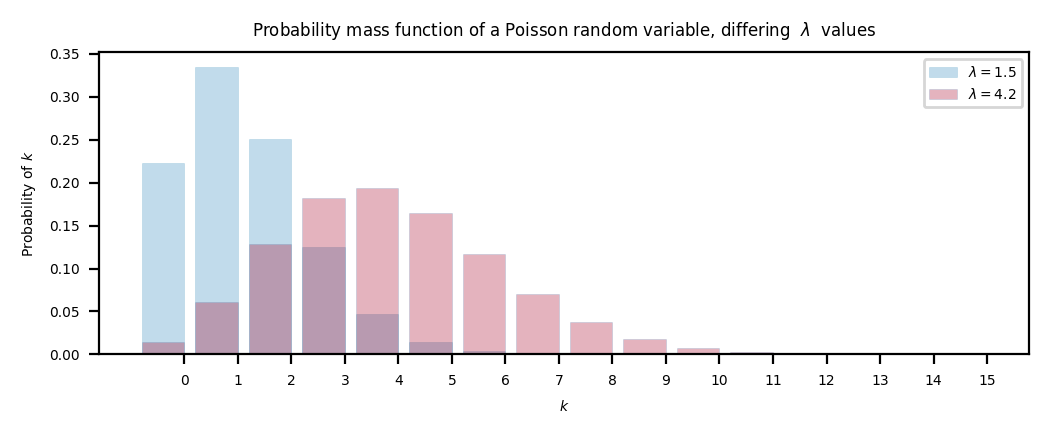

In [5]:
import scipy.stats as stats
a = np.arange(16)

poi = stats.poisson

lambda_ = [1.5, 4.25]
plt.bar(a,poi.pmf(a,lambda_[0]), color = colors[0],label = "$\lambda = %.1f$" %lambda_[0], alpha = 0.3, edgecolor = colors[0],lw=.2)
plt.bar(a,poi.pmf(a,lambda_[1]), color = colors[1],label = "$\lambda = %.1f$" %lambda_[1], alpha = 0.3, edgecolor = colors[0],lw=.2)
plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable, differing  $\lambda$  values")

**1.3.1 Continous Case**

---

Probability Density function of an exponential random variable , differing $\lambda$ values

Text(0.5, 1.0, 'Probaility Density function of a Exponential Random Variable')

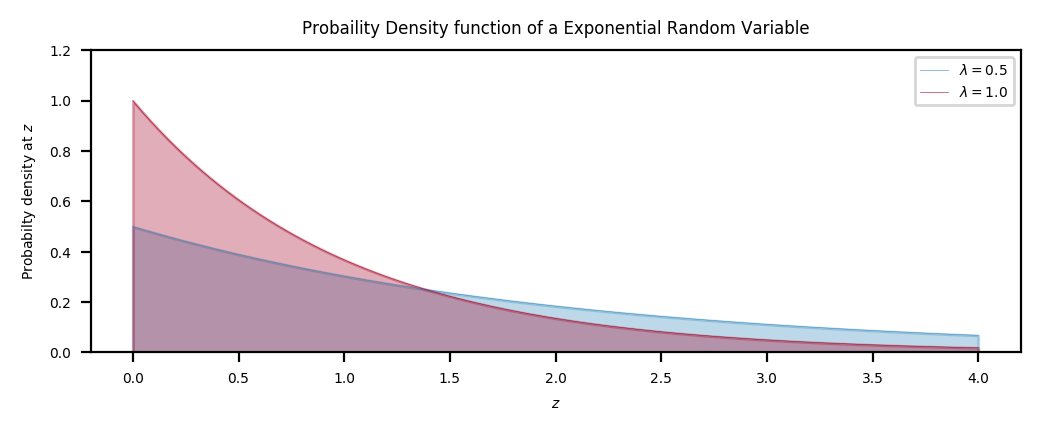

In [6]:
a = np.linspace(0,4,100)
expo = stats.expon
lambda_ = [0.5, 1]

for l,c in zip (lambda_, colors):
  plt.plot(a,expo.pdf(a,scale=1./l),lw=.2, color = c, label = "$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a,scale = 1./l), color = c, alpha=.33)
  
plt.legend()
plt.ylabel("Probabilty density at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probaility Density function of a Exponential Random Variable")

**1.4 Perform Bayesian Inference for Us**

---


**1.4.1 Example Infering Behavior from Text-Message Data**

(-1, 74)

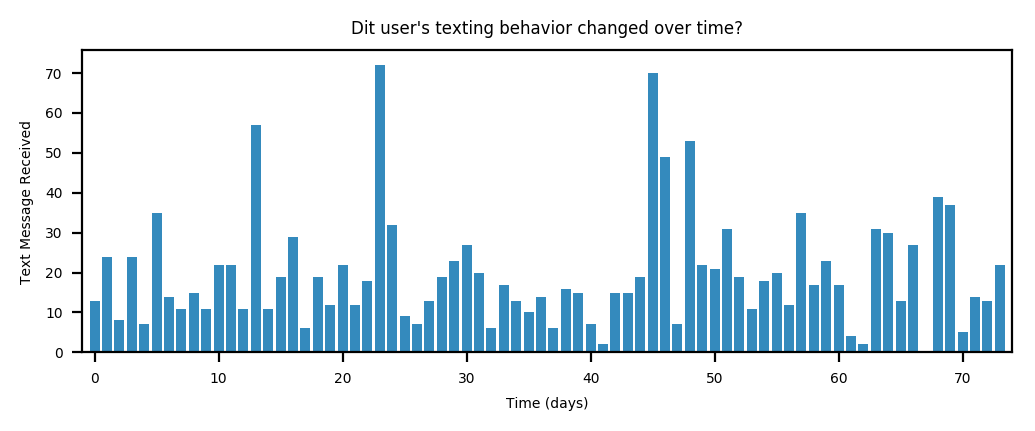

In [7]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv",header=None )
count_data = df[0].values

n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color = "#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("Text Message Received")
plt.title("Dit user's texting behavior changed over time?")
plt.xlim(-1,n_count_data)

**1.4.2 Introducing PyMC**

In [0]:
import pymc3 as pm

with pm.Model() as model:
  alpha = 1.0/count_data.mean()
  lambda_1 = pm.Exponential("lambda_1", alpha)
  tau = pm.DiscreteUniform("tau", lower = 0, upper=n_count_data-1)
  lambda_2 = pm.Exponential("lambda_2", alpha)
  
  


In [0]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [0]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [11]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [lambda_2]
>Metropolis: [tau]
>Metropolis: [lambda_1]
100%|██████████| 15000/15000 [00:05<00:00, 2636.94it/s]
The number of effective samples is smaller than 25% for some parameters.


In [0]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


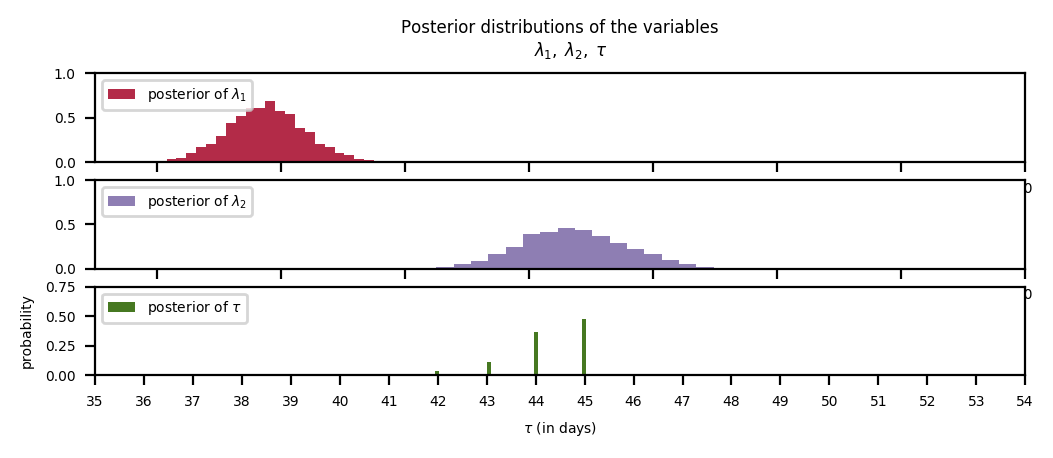

In [13]:
figsize(6, 2)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

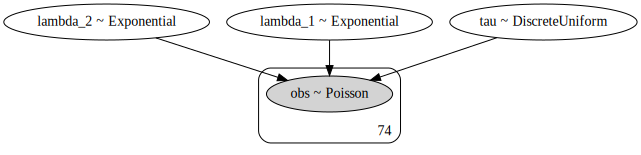

In [14]:
pm.model_to_graphviz(model)

In [0]:

data = np.array([0,0,0])
with pm.Model() as coin:
  prior = pm.Uniform("prior",0,1)
  coin_flip = pm.Bernoulli("coin_flip",prior)

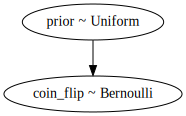

In [39]:
pm.model_to_graphviz(coin)

In [46]:
coin.prior.tag.test_value

array(0.5)

In [47]:
coin.prior.random()

array(0.67677173)

In [48]:
with pm.Model() as randomWalk:
  sd = pm.Exponential("sd", 1)
  value = pm.Normal("value", mu = value,sd = sd)

NameError: ignored

In [0]:
value = [0,1,2,3,4]

In [52]:
value[1:]

[1, 2, 3, 4]

In [0]:
import pystan as ps